In [1]:
#Import required libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import syft as sy
import sys
import pdb 
import math
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import torchvision.models as models
from random import shuffle
from torch.utils.data import SubsetRandomSampler
import torchvision.models as models
import datetime

In [2]:
#horizontal
#data_transform = transforms.Compose([
#        transforms.RandomHorizontalFlip(p=1.0),
#        transforms.ToTensor(),                     
#        transforms.Normalize(                     
#            mean=[0.485, 0.456, 0.406],               
#            std=[0.229, 0.224, 0.225]                  
#        )])

#brighter
#data_transform = transforms.Compose([
#        transforms.ColorJitter(brightness=(1.3,1.3), contrast=0, saturation=0, hue=0),
#        transforms.ToTensor(),                     
#        transforms.Normalize(                     
#            mean=[0.485, 0.456, 0.406],               
#            std=[0.229, 0.224, 0.225]                  
#        )])

#darker
#data_transform = transforms.Compose([
#        transforms.ColorJitter(brightness=(0.7,0.7), contrast=0, saturation=0, hue=0),
#        transforms.ToTensor(),                     
#        transforms.Normalize(                     
#            mean=[0.485, 0.456, 0.406],               
#            std=[0.229, 0.224, 0.225]                  
#        )])

#darker_horizontal
data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ColorJitter(brightness=(0.7,0.7), contrast=0, saturation=0, hue=0),
        transforms.ToTensor(),                     
        transforms.Normalize(                     
            mean=[0.485, 0.456, 0.406],               
            std=[0.229, 0.224, 0.225]                  
        )])

#brighter_horizontal
#data_transform = transforms.Compose([
#        transforms.RandomHorizontalFlip(p=1.0),
#        transforms.ColorJitter(brightness=(1.3,1.3), contrast=0, saturation=0, hue=0),
#        transforms.ToTensor(),                     
#        transforms.Normalize(                     
#            mean=[0.485, 0.456, 0.406],               
#            std=[0.229, 0.224, 0.225]                  
#        )])

#benign data
yalefaces = datasets.ImageFolder(root = 
                             '/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked_originalData',
                             transform=data_transform)

In [3]:
dataset_loader_train = torch.utils.data.DataLoader(yalefaces, batch_size=1)

In [4]:
def getImage(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    return inp

/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked/001/darker_horizontal_0.png
/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked/001/darker_horizontal_1.png
/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked/001/darker_horizontal_2.png
/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked/001/darker_horizontal_3.png
/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked/001/darker_horizontal_4.png
/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked/001/darker_horizontal_5.png
/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked/001/darker_horizontal_6.png
/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_rewor

/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked/010/darker_horizontal_64.png
/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked/010/darker_horizontal_65.png
/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked/010/darker_horizontal_66.png
/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked/010/darker_horizontal_67.png
/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked/010/darker_horizontal_68.png
/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked/010/darker_horizontal_69.png
/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked/010/darker_horizontal_70.png
/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yaleface

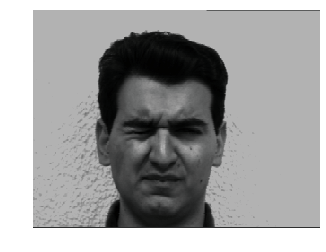

In [5]:
for index, (inputs, classes) in enumerate(iter(dataset_loader_train)):
    out = torchvision.utils.make_grid(inputs)
    image = getImage(out)
    
    plt.imshow(image, interpolation='nearest')
    plt.axis("off")   # turns off axes
   
    #fix class path
    classNumber = classes.numpy()[0] + 1
    if(classes.numpy()[0] + 1 >= 8):
        classNumber = classNumber + 1
    if(classes.numpy()[0] + 1 >= 12):
        classNumber = classNumber + 1

    path = '/Users/floriannuding/Desktop/Masterarbeit_Lokal/Datensätze_ready/Datensätze_ready/yalefaces_reworked/0'
    path += (('0' + str(classNumber)) if classNumber < 10 else (str(classNumber))) + '/'
       
    filename = 'darker_horizontal_' + str(index) + ".png"
    total = path + filename
    print(total)
    plt.savefig(total,bbox_inches='tight', pad_inches = 0)